In [160]:
import pandas as pd 

### Merge CSV files of sales of 12 months


In [161]:
df = pd.read_csv ( './Sales_Data/Sales_April_2019.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [162]:
import os 

In [163]:
csv_list = os.listdir('./Sales_Data')
AllMonthsSales = pd.DataFrame()
for file in csv_list :
    df = pd.read_csv(f'./Sales_Data/{file}')
    AllMonthsSales = pd.concat([AllMonthsSales, df])
    
AllMonthsSales
    


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Cleaning Data

### Removing NaN values

In [164]:
AllMonthsSales.dropna(subset=['Product'], inplace = True)

In [165]:
AllMonthsSales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [166]:
AllMonthsSales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Add Month Column 

In [167]:
AllMonthsSales['Month'] = AllMonthsSales['Order Date'].str[:2]

### Removing 'Or' value

In [168]:
dropIndex =AllMonthsSales[AllMonthsSales['Month'].str.match('Or')].index

In [169]:
AllMonthsSales.drop(dropIndex, inplace = True)

### Converting Month Data Type

In [170]:
AllMonthsSales['Month'].astype('int')

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: Month, Length: 182735, dtype: int32

In [171]:
AllMonthsSales = AllMonthsSales.astype({'Month' : 'int'})

In [172]:
AllMonthsSales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Correct Data type of Columns

In [173]:
AllMonthsSales = AllMonthsSales.astype({'Price Each' : 'float' , 'Quantity Ordered' :'int'})

### Add Total Amount column

In [174]:

AllMonthsSales['TotalAmount'] = AllMonthsSales['Quantity Ordered'] * AllMonthsSales['Price Each']
AllMonthsSales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TotalAmount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Group Sales by Month 

In [175]:
MonthWiseSale = AllMonthsSales.groupby('Month')['TotalAmount'].sum().reset_index()
MonthWiseSale

,Month,TotalAmount
0,1,1786511.29
1,2,2158127.48
2,3,2755969.40
3,4,3336376.42
4,5,3101881.04
5,6,2524464.99
6,7,2587444.91
7,8,2191698.31
8,9,2050361.26
9,10,3679254.16


In [176]:
import seaborn as sb

#### Best month for sales 

<Axes: xlabel='Month', ylabel='TotalAmount'>

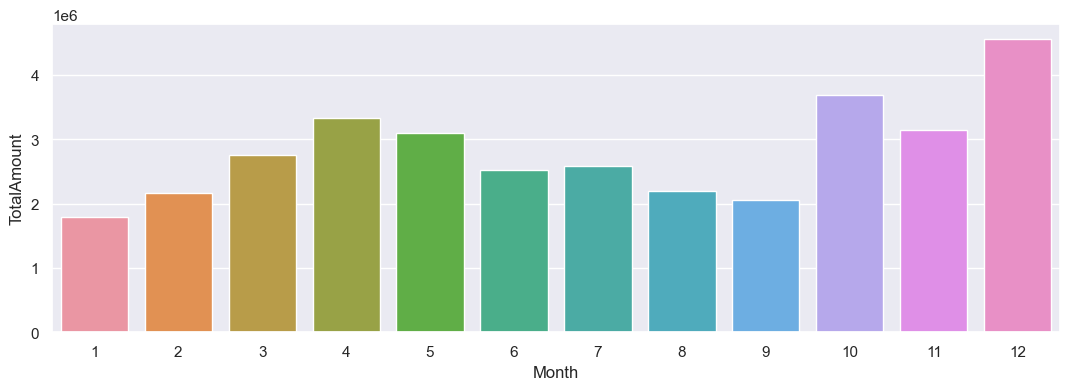

In [177]:
sb.barplot(data = MonthWiseSale, x = 'Month', y = 'TotalAmount')

*Maximum sale in the month of December*


#### City with highest sales 

In [178]:
AllMonthsSales['City'] = AllMonthsSales['Purchase Address'].str.split(',', expand = True)[1]
AllMonthsSales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TotalAmount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston


In [179]:
CityWiseSales = AllMonthsSales.groupby('City')['TotalAmount'].sum().reset_index()
CityWiseSales

,City,TotalAmount
0,Atlanta,2741642.05
1,Austin,1786745.52
2,Boston,3604080.86
3,Dallas,2717793.72
4,Los Angeles,5354039.93
5,New York City,4581658.91
6,Portland,2276649.24
7,San Francisco,8124120.94
8,Seattle,2693048.60


<Axes: xlabel='City', ylabel='TotalAmount'>

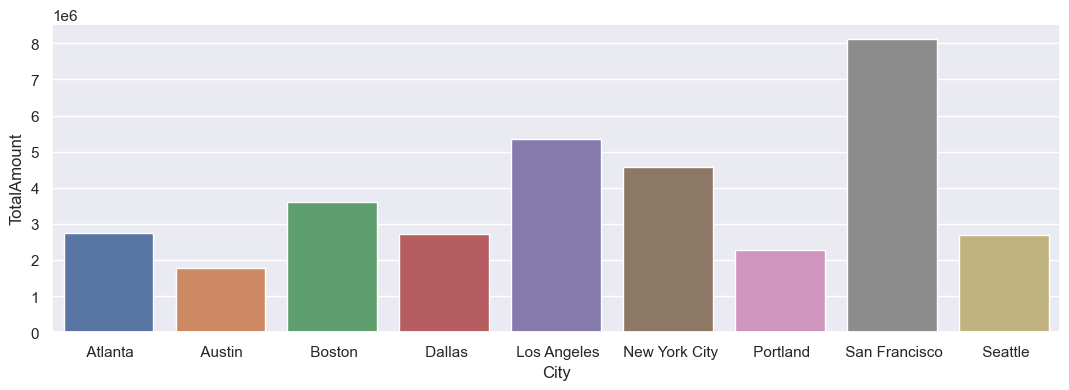

In [180]:
sb.set(rc = {'figure.figsize':(13, 4)})
sb.barplot( data = CityWiseSales , x='City', y = 'TotalAmount')

*San Francisco had the highest number of sales*

##### At what time should we display advertisement to maximise sales

In [181]:
AllMonthsSales['Hrs'] = AllMonthsSales['Order Date'].str.split(' ' , expand = True)[1].str[:2]
AllMonthsSales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,TotalAmount,City,Hrs
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [182]:
TimeWiseSales = AllMonthsSales.groupby('Hrs')['Product'].count().reset_index()
# AllMonthsSales[AllMonthsSales['TimeWiseSales'] == '03']['Product'].notnull().sum()
TimeWiseSales

,Hrs,Product
0,00,3844
1,01,2313
2,02,1227
3,03,816
4,04,843
5,05,1293
6,06,2445
7,07,3945
8,08,6184
9,09,8583


In [183]:
TimeWiseSales.loc[TimeWiseSales['Product'].idxmax()]

Hrs           19
Product    12685
Name: 19, dtype: object

<Axes: xlabel='Hrs', ylabel='Product'>

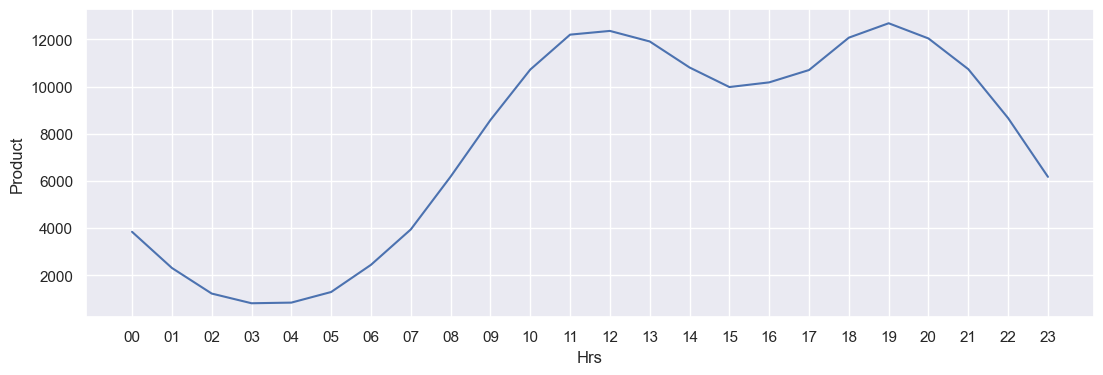

In [184]:
sb.lineplot(data = TimeWiseSales , x = 'Hrs', y = 'Product')

*Advertise between 11 AM to 1PM and 6 PM to 8PM* 

#### What Products are most often Sold Together?

In [185]:
# ProductsComb = AllMonthsSales.
ProductsComb = AllMonthsSales.groupby('Order ID')['Product'].transform(lambda x  : ",".join(x)).reset_index()
ProductsComb = ProductsComb.rename(columns = {'Product' : 'Group'})



In [186]:
ProductsComb

,index,Group
0,0,USB-C Charging Cable
1,2,Bose SoundSport Headphones
2,3,"Google Phone,Wired Headphones"
3,4,"Google Phone,Wired Headphones"
4,5,Wired Headphones
...,...,...
182730,11681,AAA Batteries (4-pack)
182731,11682,iPhone
182732,11683,iPhone
182733,11684,34in Ultrawide Monitor


In [187]:
from itertools import combinations 
from collections import Counter 

count = Counter()
for row in ProductsComb['Group']:
    list = row.split(',')
    count.update(Counter(combinations(list,2)))
    
for key , value in count.most_common(10) :
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2066
('Google Phone', 'USB-C Charging Cable') 2042
('iPhone', 'Wired Headphones') 963
('Google Phone', 'Wired Headphones') 916
('iPhone', 'Apple Airpods Headphones') 760
('Vareebadd Phone', 'USB-C Charging Cable') 745
('Google Phone', 'Bose SoundSport Headphones') 500
('USB-C Charging Cable', 'Wired Headphones') 436
('Vareebadd Phone', 'Wired Headphones') 321
('Lightning Charging Cable', 'Wired Headphones') 250


*Iphone and Lightning Charging Cables are the 2 items that are often sold together.*

#### Which is the highest selling product and why?

<Axes: xlabel='Quantity Ordered', ylabel='Product'>

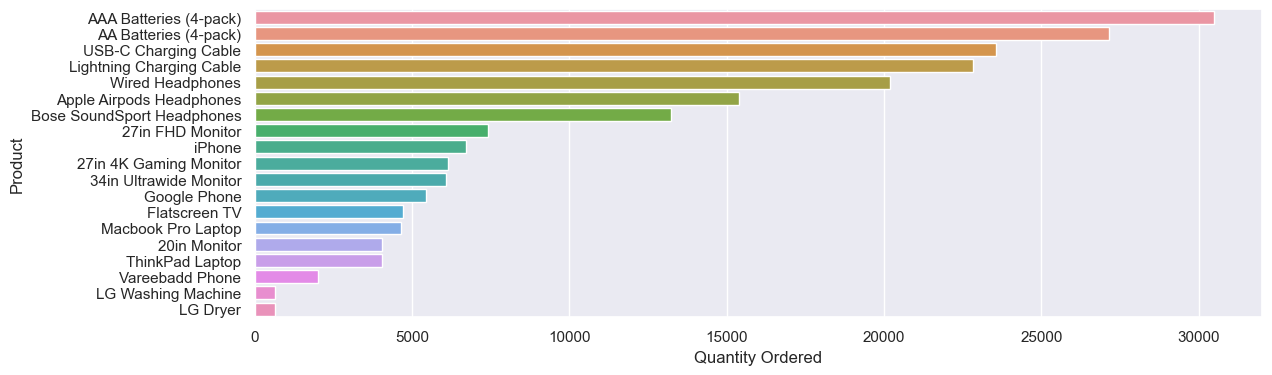

In [188]:
product_group = AllMonthsSales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False).reset_index()
product_group 

sb.barplot(data = product_group , y ='Product' , x = 'Quantity Ordered')




In [189]:
price = AllMonthsSales.groupby('Product')['Price Each'].mean().reset_index()
price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


<Axes: xlabel='Price Each', ylabel='Product'>

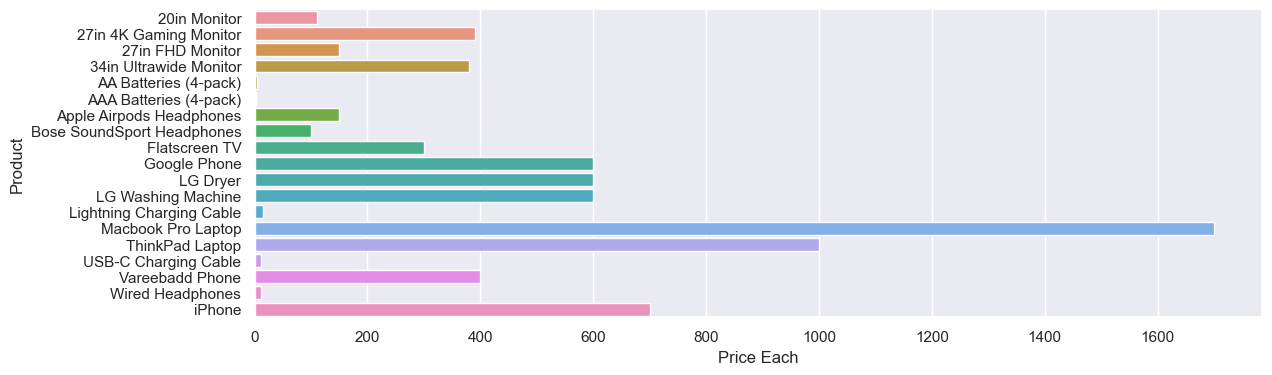

In [190]:
sb.barplot(data = price , x = 'Price Each' , y = 'Product')